# Linear Regression
### Patrick Corrigan
This is a Linear Trendline Generator. It randomly generates 50 points that are approximately on the line y = 1.25x + 6. The linear regression algorithm takes these points as inputs and generates a prediction for what the trendline is. It is shown below that the algorithm produces a fairly accurate prediction as to what the line of best fit is. 

### Importing Scientific Packages
This cell imports the packages NumPy, Pandas, MatPlotLib, and SciKit-Learn.

In [1]:
import numpy as np
from numpy import random

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import interpolate

### Data Generator
This cell generates 50 points approximately along the line y = 1.25x + 6. These points are used as inputs for the linear regression algorithm. All datapoints and parameters are saved to CSV files.

             Parameters
Point count       50.00
Error              0.05
Slope              1.25
Y Intercept        6.00



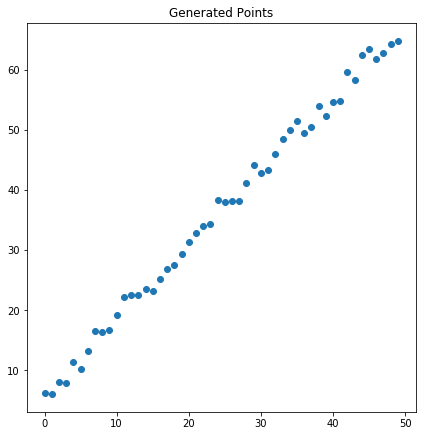

In [2]:
def remove_indices(length):
    indices_list = []
    for i in range (0, length):
        indices_list.append('')
    return indices_list

n = 50
error = 0.05
slope = 1.25
y_int = 6
data_array = np.zeros((n,2))

for i in range(0, n):
    data_array[i, 0] = i
    dev = n * error * random.uniform(-1, 1)
    y_val = (slope*i+y_int) + dev
    data_array[i, 1] = y_val

data_df = pd.DataFrame(data_array, index = remove_indices(len(data_array)), columns = ['X_val', 'Y_val'])
param_df = pd.DataFrame([[n],[error],[slope],[y_int]], 
                        columns = ['Parameters'], 
                        index = ['Point count', 'Error', 'Slope', 'Y Intercept'], )

data_df.to_csv(('LinearRegressionData'), index = True)
param_df.to_csv(('LinearRegressionDataParameters'))

print(param_df)
print()

fig = plt.figure(figsize = (6,6))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title('Generated Points')
axes.scatter(data_df['X_val'], data_df['Y_val']);

### Linear Regression Algorithm
This cell implements the Linear Regression Algorithm. It takes the previous generated points and splits them into test sets and training sets. The training set is used as inputs to determine what the line of best fit is. Gradient descent is used for the optimization algorithm. The predicted equation, as well as the number of repetitions completed, can be found printed out underneath this cell.

In [3]:
us_data_df = pd.read_csv('LinearRegressionData', index_col = 0)
us_param_df = pd.read_csv('LinearRegressionDataParameters', index_col = 0)

yval_array = us_data_df[['Y_val']].to_numpy()
xval_array = us_data_df[['X_val']].to_numpy()

point_count = us_param_df.loc['Point count'].to_numpy()
error = us_param_df.loc['Error'].to_numpy()
slope = us_param_df.loc['Slope'].to_numpy()
y_intercept = us_param_df.loc['Y Intercept'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(xval_array, yval_array, test_size = 0.2)

theta_df = pd.DataFrame(random.rand(1,2), index = ['Theta values'], columns = ['Theta 1','Theta 2'])
theta_array = theta_df.to_numpy()
theta_memory = np.empty((0,4))
theta_temp = np.zeros((1,4))
theta_temp[0,0] = theta_array[0,0]
theta_temp[0,1] = theta_array[0,1]
theta_temp[0,2] = 0
theta_temp[0,3] = sum((x_train*theta_array[0,0] + theta_array[0,1]) - y_train)

theta_memory = np.append(theta_memory, theta_temp, axis = 0)

alpha = 10**-3.25
num = x_train.shape[0]
cost_list = [0]
move_num = 0
theta_num = 0

while move_num <= 10**5:
    
    h = (x_train*theta_array[0,0] + theta_array[0,1])
    cost = h - y_train
    dd1 = sum(cost*x_train)
    dd2 = sum(cost*1)
    theta_df['Theta 1'] = theta_array[0,0] - alpha*(1/num)*dd1
    theta_df['Theta 2'] = theta_array[0,1] - alpha*(1/num)*dd2
    
    s_cost = sum(cost)
    diff_cost = abs(s_cost-cost_list[-1])
    cost_list.append(s_cost)
    
    if diff_cost <= 10**-7:
        print('Ideal error found!')
        print(move_num, 'repetitions passed')
        
        theta_temp[0,0] = theta_array[0,0]
        theta_temp[0,1] = theta_array[0,1]
        theta_temp[0,2] = move_num
        theta_temp[0,3] = s_cost
        
        theta_memory = np.append(theta_memory, theta_temp, axis = 0)
        
        break
    else:
        pass
    
    if move_num%20000 == 0 and move_num != 0:
        theta_temp[0,0] = theta_array[0,0]
        theta_temp[0,1] = theta_array[0,1]
        theta_temp[0,2] = move_num
        theta_temp[0,3] = s_cost
        
        theta_memory = np.append(theta_memory, theta_temp, axis = 0)
    else:
        pass
    
    move_num += 1

theta_memory_df = pd.DataFrame(theta_memory, index = remove_indices(len(theta_memory)), 
                               columns = ['Theta1','Theta2','Repetition Count','Cost'])    
print('')
print(theta_df)
print('')
print('The predicted equation is y = ', round(theta_array[0,0], 3) , 'x + ', round(theta_array[0,1], 3) )

Ideal error found!
85319 repetitions passed

               Theta 1   Theta 2
Theta values  1.232015  6.162312

The predicted equation is y =  1.232 x +  6.162


### Testing the Linear Regression Algorithm
The predicted line of best fit equation from the previous cell is used here to calculate the predicted values for each X value in the test set. The percent error between the predicted values and the actual Y values is averaged together over the test set, to produce the Avg Percent Error, which can be seen below this cell along with the $R^2$ value. There is also a graph that visually displays the predicted line of best fit against the test data, as well as a graph that shows the decreasing cost as the algorithm completes repetitions and trains on the dataset. 

  Avg Percent Error  R Squared
              2.288      0.995

    Theta1    Theta2  Repetition Count         Cost
  0.443806  0.390984               0.0 -1060.838390
  1.244269  5.742044           20000.0    -3.909100
  1.232910  6.131626           40000.0    -0.286130
  1.232078  6.160142           60000.0    -0.020944
  1.232018  6.162229           80000.0    -0.001533
  1.232015  6.162312           85319.0    -0.000765



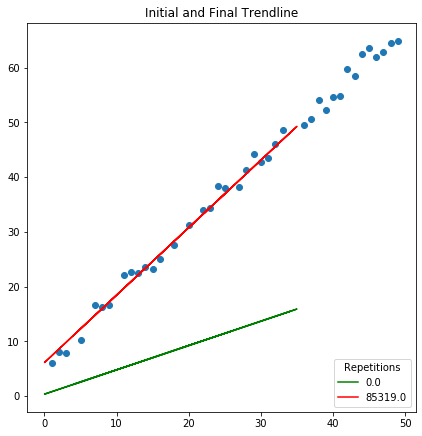

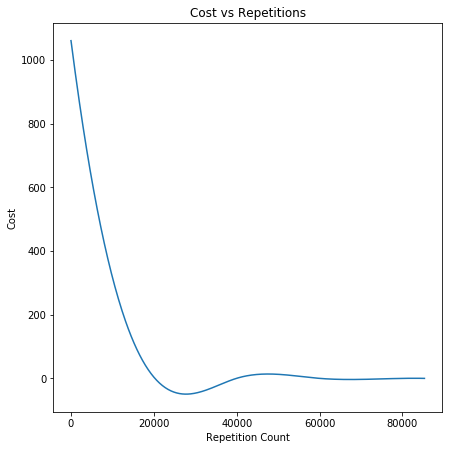

In [4]:
test = theta_array[0,0] * x_test + theta_array[0,1]
percent_err = ((abs(test-y_test))/y_test)*100

avg_percent_err = np.zeros((1,2))
avg_percent_err[0,0] = sum(percent_err)/len(percent_err)

avg_percent_err[0,0] = round(avg_percent_err[0,0], 3)
avg_percent_err[0,1] = rsquared = round(r2_score(y_test, test),3)

error_df = pd.DataFrame(avg_percent_err, index = [''], 
                        columns = ['Avg Percent Error', 'R Squared'])
dim = len(x_test)
y_memory = np.empty((dim,0))

for i in range(0, len(theta_memory)):
    
    y_temp = x_test*theta_memory[i,0] + theta_memory[i,1]
    y_memory = np.append(y_memory, y_temp, axis = 1)

fig_1 = plt.figure(figsize = (6,6))
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
axes_1.set_title('Initial and Final Trendline')
axes_1.scatter(x_train,y_train)
axes_1.plot(x_test, y_memory[:,0], 'g', label = theta_memory[0,2])
axes_1.plot(x_test, y_memory[:,-1], 'r', label = theta_memory[-1,2])
axes_1.legend(loc='lower right', title = 'Repetitions')

fig_2 = plt.figure(figsize = (6,6))
axes_2 = fig_2.add_axes([0.1,0.1,0.9,0.9])
axes_2.set_ylabel('Cost')
axes_2.set_xlabel('Repetition Count')
axes_2.set_title('Cost vs Repetitions')

x_2 = (theta_memory_df['Repetition Count'])
y_2 = (theta_memory_df['Cost'])*-1
x_y_2_spline = interpolate.make_interp_spline(x_2, y_2)
x_2_temp = np.linspace(x_2.min(), x_2.max(), 500)
y_2_temp = x_y_2_spline(x_2_temp)

axes_2.plot(x_2_temp, y_2_temp)

print(error_df)
print('')
print(theta_memory_df)
print('')